In [49]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

'''
src_path = sys.path[0].replace("figures\visualization\script", "src")
#replace notebook as scripts
data_path = sys.path[0].replace("figures\visualization\script", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures\visualization\script", "output")
'''

# set default params of plot
rc_={
    "figure.dpi":300,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

In [50]:
pd_real=pd.read_csv("L:\Coding_project\Energy_grid_new\data\load_forecast\error_shift\BLD_Sum_real.csv")
pd_xgb=pd.read_csv("L:\Coding_project\Energy_grid_new\data\load_forecast\error_shift\BLD_Sum_XGB.csv")

In [51]:
pd_xgb["DateTime"]=pd.to_datetime(pd_xgb["DateTime"])
pd_xgb.set_index("DateTime")
pd_real["DateTime"]=pd.to_datetime(pd_real["DateTime"])
pd_real.set_index("DateTime")

,RealPower,RealPower_before_scaling
DateTime,,
2017-01-01 00:15:00,51.7251,517.251
2017-01-01 00:30:00,53.0934,530.934
2017-01-01 00:45:00,52.5827,525.827
2017-01-01 01:00:00,53.2716,532.716
2017-01-01 01:15:00,53.0779,530.779
...,...,...
2020-02-29 22:45:00,73.9566,739.566
2020-02-29 23:00:00,73.3863,733.863
2020-02-29 23:15:00,69.5311,695.311


In [52]:
pd_merged=pd.merge(pd_xgb,pd_real)

In [53]:
pd_merged["error"]=(pd_merged["RealPower_pred"]-pd_merged["RealPower"])

In [54]:
mean_error=np.mean(abs(pd_merged["error"]))

In [55]:
mean_error

2.662078489202055

In [37]:
pd_merged=pd_merged.drop(columns=["RealPower_before_scaling"],errors="ignore")
for i in [0.05,0.10,0.15]:
    pd_merged["pred_shift"+str(i)]=pd_merged["RealPower_pred"]+(np.mean(pd_merged["RealPower_pred"])-np.mean(pd_merged["RealPower"]))*i


0.05170329565524412

In [38]:
pd_merged["error"]=(pd_merged["RealPower_pred"]-pd_merged["RealPower"])/pd_merged["RealPower"]

In [39]:
pd_merged

,DateTime,RealPower_pred,RealPower,error,pred_shift0.05,pred_shift0.1,pred_shift0.15
0,2019-01-01 00:00:00,50.629498,52.3299,-0.032494,50.632083,50.634669,50.637254
1,2019-01-01 00:15:00,50.629498,51.4773,-0.016469,50.632083,50.634669,50.637254
2,2019-01-01 00:30:00,51.012135,51.2424,-0.004494,51.014721,51.017306,51.019891
3,2019-01-01 00:45:00,50.693512,50.9020,-0.004096,50.696097,50.698683,50.701268
4,2019-01-01 01:00:00,50.257730,51.7313,-0.028485,50.260315,50.262900,50.265486
...,...,...,...,...,...,...,...
35035,2019-12-31 22:45:00,50.665656,48.4871,0.044931,50.668242,50.670827,50.673412
35036,2019-12-31 23:00:00,49.192478,48.3798,0.016798,49.195063,49.197649,49.200234
35037,2019-12-31 23:15:00,48.032908,47.2761,0.016008,48.035493,48.038079,48.040664
35038,2019-12-31 23:30:00,48.396047,46.1340,0.049032,48.398632,48.401217,48.403802


In [31]:
pd_merged_n=pd_merged.drop(pd_merged[abs(pd_merged['error'])>1].index)

In [32]:
pd_merged_n

,DateTime,RealPower_pred,RealPower,error
0,2019-01-01 00:00:00,50.629498,52.3299,-0.032494
1,2019-01-01 00:15:00,50.629498,51.4773,-0.016469
2,2019-01-01 00:30:00,51.012135,51.2424,-0.004494
3,2019-01-01 00:45:00,50.693512,50.9020,-0.004096
4,2019-01-01 01:00:00,50.257730,51.7313,-0.028485
...,...,...,...,...
35035,2019-12-31 22:45:00,50.665656,48.4871,0.044931
35036,2019-12-31 23:00:00,49.192478,48.3798,0.016798
35037,2019-12-31 23:15:00,48.032908,47.2761,0.016008
35038,2019-12-31 23:30:00,48.396047,46.1340,0.049032


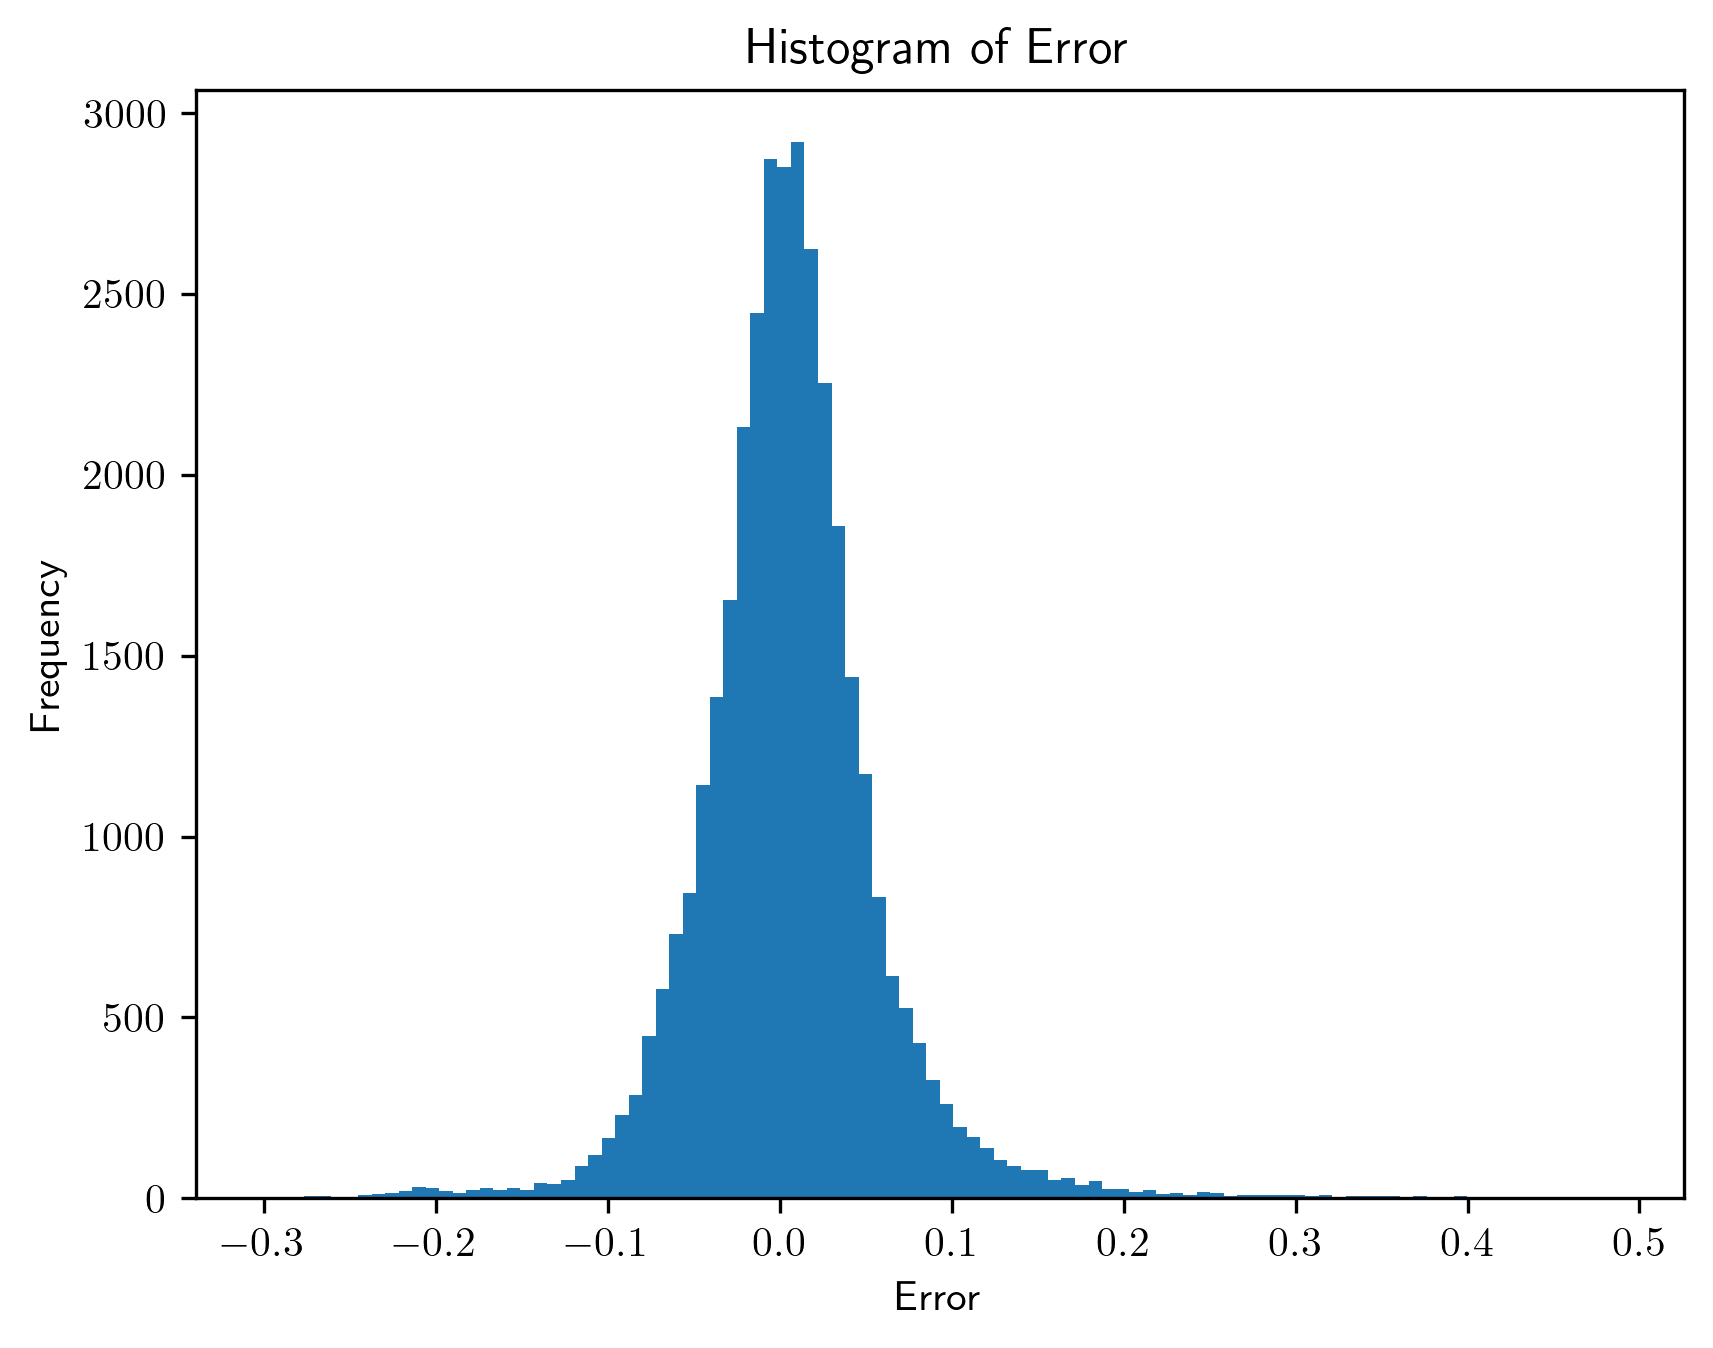

In [35]:
plt.hist(pd_merged_n['error'], bins=100)  # Adjust the number of bins as needed
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Error')
plt.show()